<a href="https://colab.research.google.com/github/zainamri/tengoknijelah/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import skew, norm, probplot
from scipy.stats import skew, kurtosis
from scipy import stats
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [6]:
# Connect to Google DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Melakukan import data "Bank Churn Modelling".
# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/winedemfor/products.csv")

In [8]:
# Pemahaman Struktur Data
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    219 non-null    int64 
 1   name       219 non-null    object
 2   producer   219 non-null    object
 3   country    219 non-null    object
 4   region     219 non-null    object
 5   vintage    219 non-null    object
 6   kind       219 non-null    object
 7   price_brl  219 non-null    object
 8   price_usd  219 non-null    object
dtypes: int64(1), object(8)
memory usage: 15.5+ KB


In [9]:
# Statistik deskriptif
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
item_id,219.0,110.0,63.364028,1.0,55.5,110.0,164.5,219.0


In [10]:
# Evaluasi Integritas Data
# Memeriksa nilai data yang hilang
missing_values = df.isna().sum().sort_values(ascending = False)
# Tampilkan nilai data yang hilang
print("Nilai-nilai yang Hilang:\n", missing_values)

Nilai-nilai yang Hilang:
 item_id      0
name         0
producer     0
country      0
region       0
vintage      0
kind         0
price_brl    0
price_usd    0
dtype: int64


In [11]:
# Memeriksa Duplikasi
df.duplicated().sum()

0

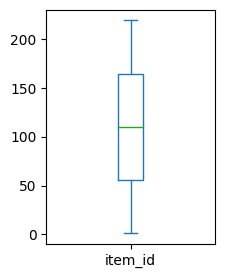

In [13]:
# Memeriksa Outlier
# Daftar nama kolom yang ingin dihapus
columns_to_drop = ['item_id']
# Menghapus kolom-kolom tersebut dari DataFrame
numerical_columns = df.drop(columns=columns_to_drop)
# Pilih hanya kolom-kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# cek outlier
numerical_columns.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [14]:
# 2.3.5. Memeriksa Outlier
# Memilih hanya atribut numerik
numeric_cols = df.select_dtypes(include='number')
# Menghitung IQR untuk setiap kolom
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
# Mengidentifikasi outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
# Menampilkan atribut numerik yang memiliki outlier
print("Atribut numerik dengan outlier:")
print(outliers[outliers].index)
outliers.sum()

Atribut numerik dengan outlier:
RangeIndex(start=0, stop=219, step=1)


item_id    0
dtype: int64

In [15]:
#Memeriksa Data Tidak Konsisten
# Cek unik nilai pada kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  unique_values = df[col].unique()
  print(f'Unique values in {col}: {unique_values}')

Unique values in name: ['Philipponnat Royale Reserve Brut' 'Philipponnat Royale Reserve Rosé'
 'Philipponnat Cuvée 1522 Grand Cru Extra Brut'
 'Philipponnat Cuvée 1522 1er Cru Rosé'
 'Philipponnat Clos Des Goisses Brut' 'Agrapart & Fils 7 Crus Brut'
 'Agrapart & Fils Terroirs Blanc de Blancs Grand Cru Extra-Brut'
 'Agrapart Minéral Blanc de Blancs Grand Cru Extra-Brut'
 'Agrapart Avizoise Blanc de Blancs Grand Cru Extra-Brut'
 'Zind-Humbrecht Gewurztraminer Hengst Grains Nobles Grand Cru - 375ml'
 'Vacheron Sancerre Blanc' 'Vacheron Sancerre Les Romains'
 'Vacheron Sancerre L’enclos des Remparts Franc de Pied'
 'Nicolas Joly La Roche Aux Moines Clos de La Bergerie'
 'Nicolas Joly Clos de La Coulee De Serrant' 'Mirabeau Classic'
 'Mirabeau Pure' 'Mirabeau Pure - 1,5L (Magnum)' 'Mirabeau Etoile'
 'Triennes Les Aureliens Rouge' 'Domaine Elian Da Ros Coucou Blanc'
 'Domaine Elian Da Ros Le Vin est une Fete'
 'Domaine Elian Da Ros Chante Coucou' 'Domaine Elian Da Ros Clos Baquey'
 'La Chabl

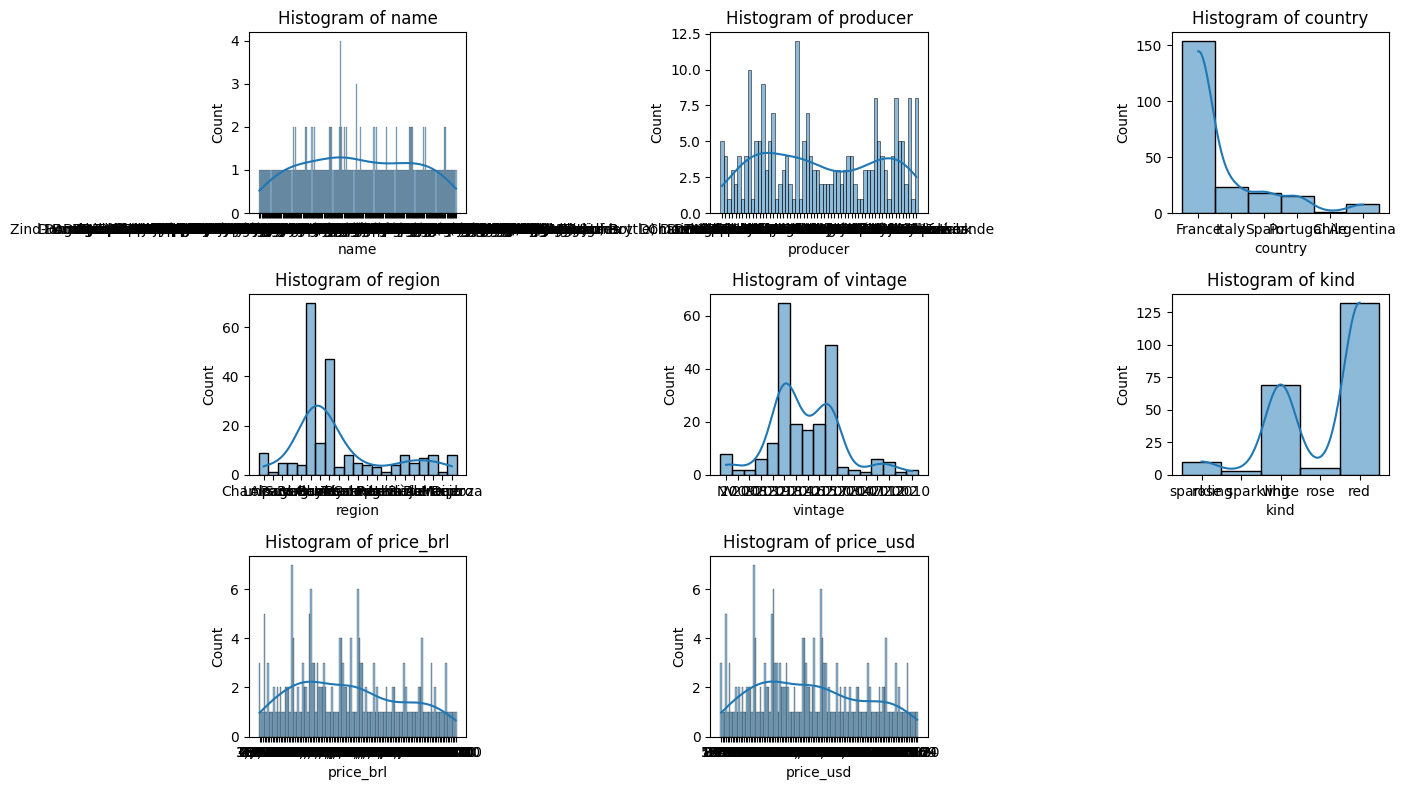

In [23]:
columns_to_plot = ['name', 'producer','country','region','vintage','kind','price_brl','price_usd']
# Membuat subplot untuk histogram
plt.figure(figsize=(14, 8))
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(3, 3, i)
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
plt.tight_layout()
plt.show()

<ipython-input-46-38ec27394c5b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_name = sns.barplot(x=labels_name, y=values_name, palette="pastel")


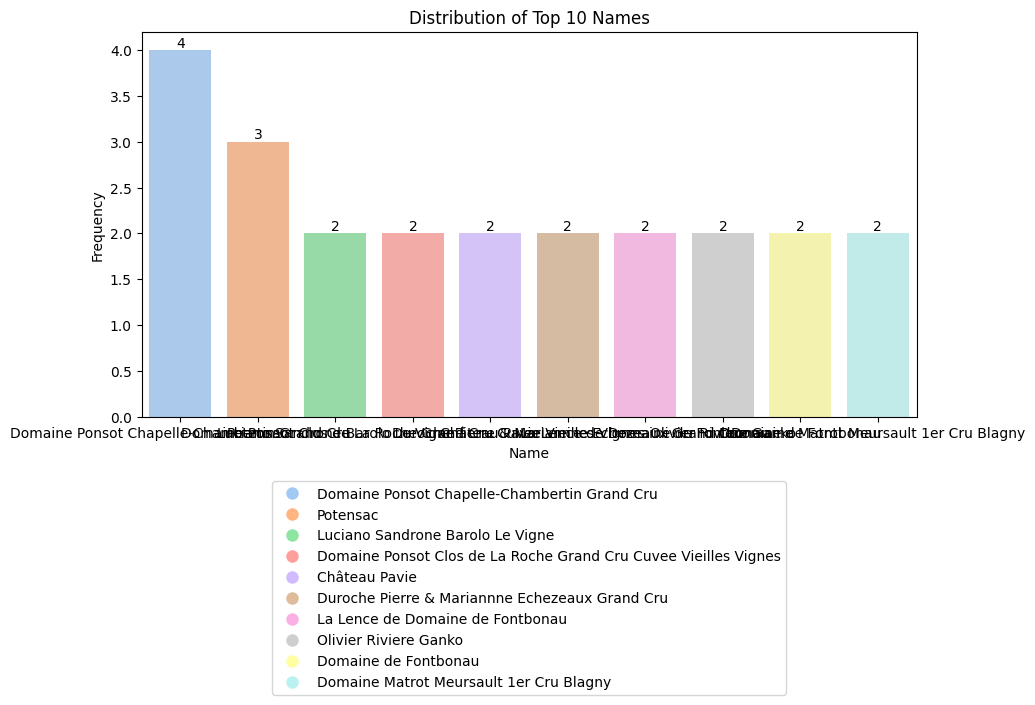

In [46]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Menghitung jumlah observasi distribusi data untuk atribut 'name'
name_counts = df_temp['name'].value_counts().head(10)

# Persiapan data untuk bar chart
labels_name = name_counts.index
values_name = name_counts.values

# Plot bar chart
plt.figure(figsize=(10, 5))
bars_name = sns.barplot(x=labels_name, y=values_name, palette="pastel")

# Tambahkan nilai data pada grafik
for i, value in enumerate(values_name):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Tambahkan legend berdasarkan warna pada sumbu x
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=sns.color_palette("pastel")[i], markersize=10)
                 for i, label in enumerate(labels_name)]

plt.title('Distribution of Top 10 Names')
plt.xlabel('Name')
plt.ylabel('Frequency')

# Letakkan legend pada posisi bawah
plt.legend(handles=legend_labels, bbox_to_anchor=(0.5, -0.15), loc='upper center')

plt.show()


<ipython-input-47-c334884c1549>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_producer = sns.barplot(x=labels_producer, y=values_producer, palette="pastel")


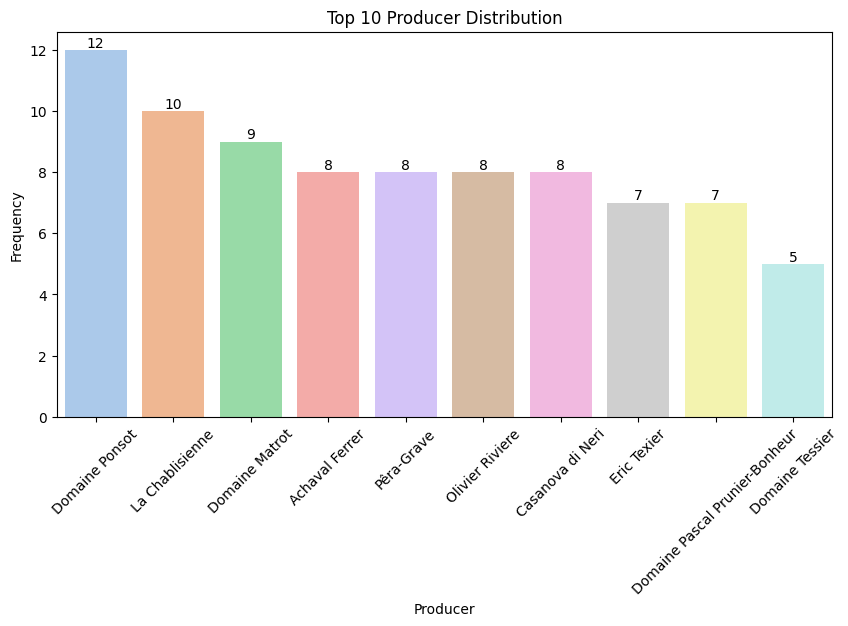

In [47]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Menghitung jumlah observasi distribusi data untuk atribut 'producer'
producer_counts = df_temp['producer'].value_counts().head(10)

# Persiapan data untuk bar chart
labels_producer = producer_counts.index
values_producer = producer_counts.values

# Plot bar chart
plt.figure(figsize=(10, 5))
bars_producer = sns.barplot(x=labels_producer, y=values_producer, palette="pastel")

# Tambahkan nilai data pada grafik
for i, value in enumerate(values_producer):
    plt.text(i, value , str(value), ha='center', va='bottom')

# Tambahkan label pada sumbu x dan y
plt.xlabel('Producer')
plt.ylabel('Frequency')
plt.title('Top 10 Producer Distribution')

plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca

plt.show()


<ipython-input-48-5c7cdec21c41>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_country = sns.barplot(x=labels_country, y=values_country, palette="pastel")


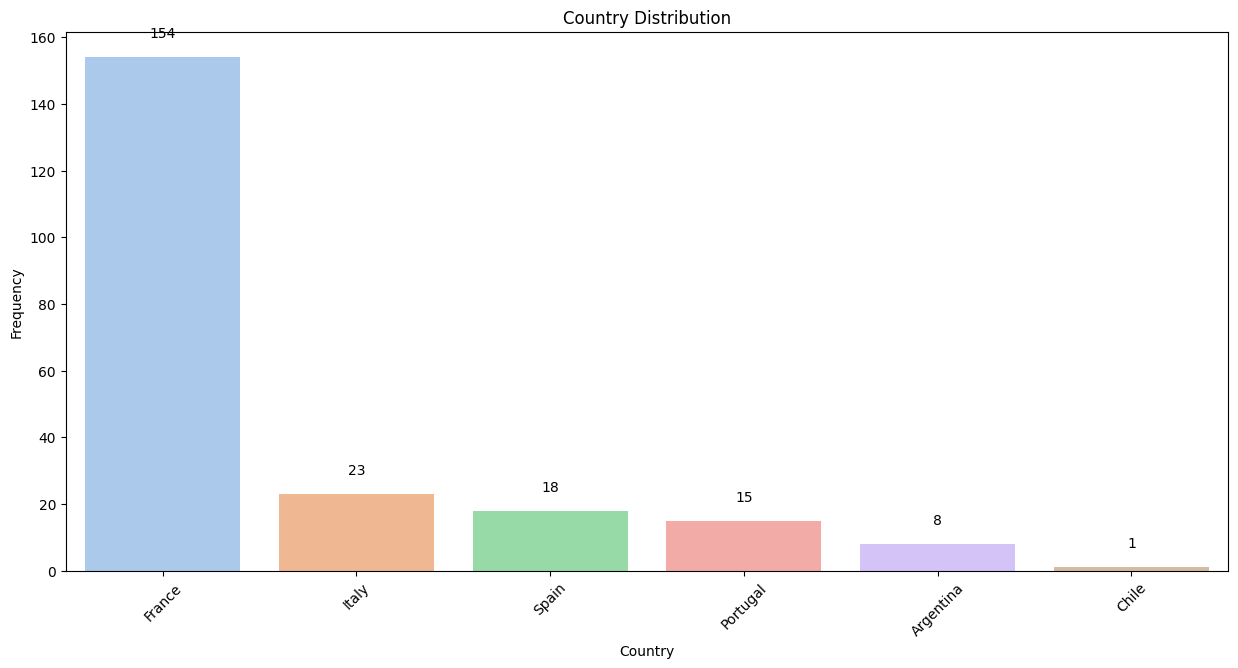

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Menghitung jumlah observasi distribusi data untuk atribut 'country'
country_counts = df_temp['country'].value_counts()

# Persiapan data untuk bar chart
labels_country = country_counts.index
values_country = country_counts.values

# Plot bar chart
plt.figure(figsize=(15, 7))
bars_country = sns.barplot(x=labels_country, y=values_country, palette="pastel")

# Tambahkan nilai data pada grafik
for i, value in enumerate(values_country):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan label pada sumbu x dan y
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Country Distribution')

plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca

plt.show()


<ipython-input-50-ef7a568d345b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_region = sns.barplot(x=labels_region, y=values_region, palette="pastel")


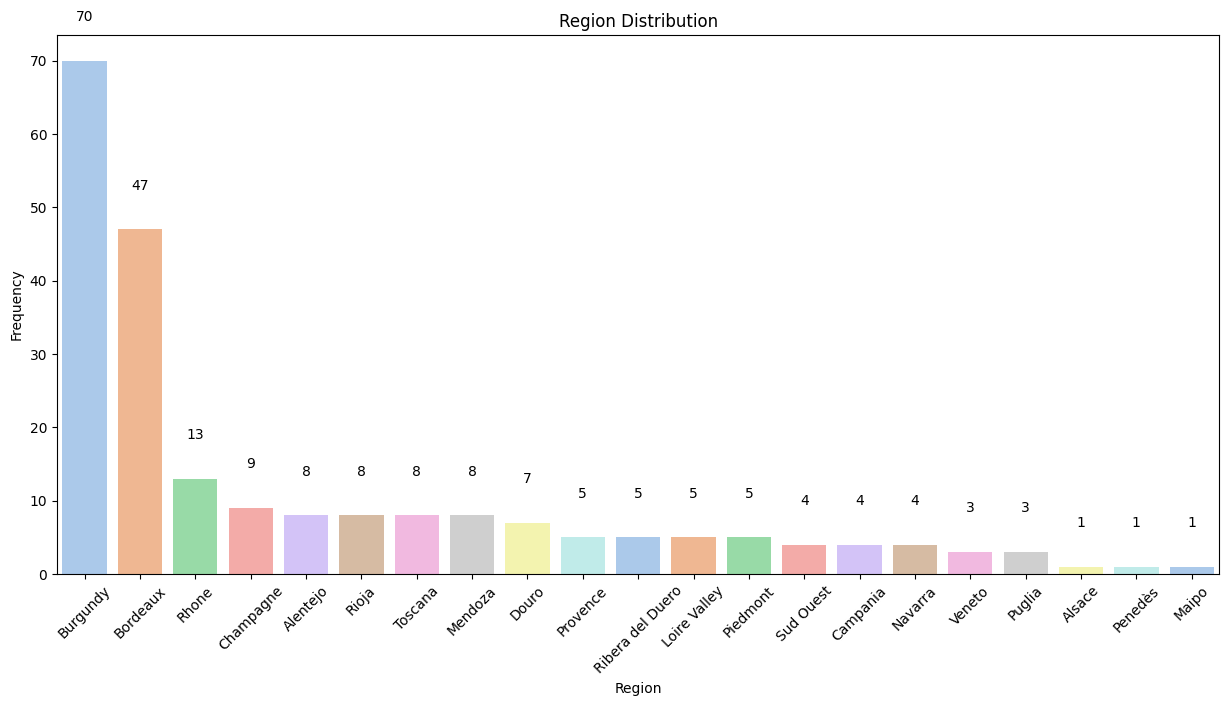

In [50]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Menghitung jumlah observasi distribusi data untuk atribut 'region'
region_counts = df_temp['region'].value_counts()

# Persiapan data untuk bar chart
labels_region = region_counts.index
values_region = region_counts.values

# Plot bar chart
plt.figure(figsize=(15, 7))
bars_region = sns.barplot(x=labels_region, y=values_region, palette="pastel")

# Tambahkan nilai data pada grafik
for i, value in enumerate(values_region):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan label pada sumbu x dan y
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Region Distribution')

plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca

plt.show()


<ipython-input-51-2aceec0a92c1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_vintage = sns.barplot(x=labels_vintage, y=values_vintage, palette="pastel")


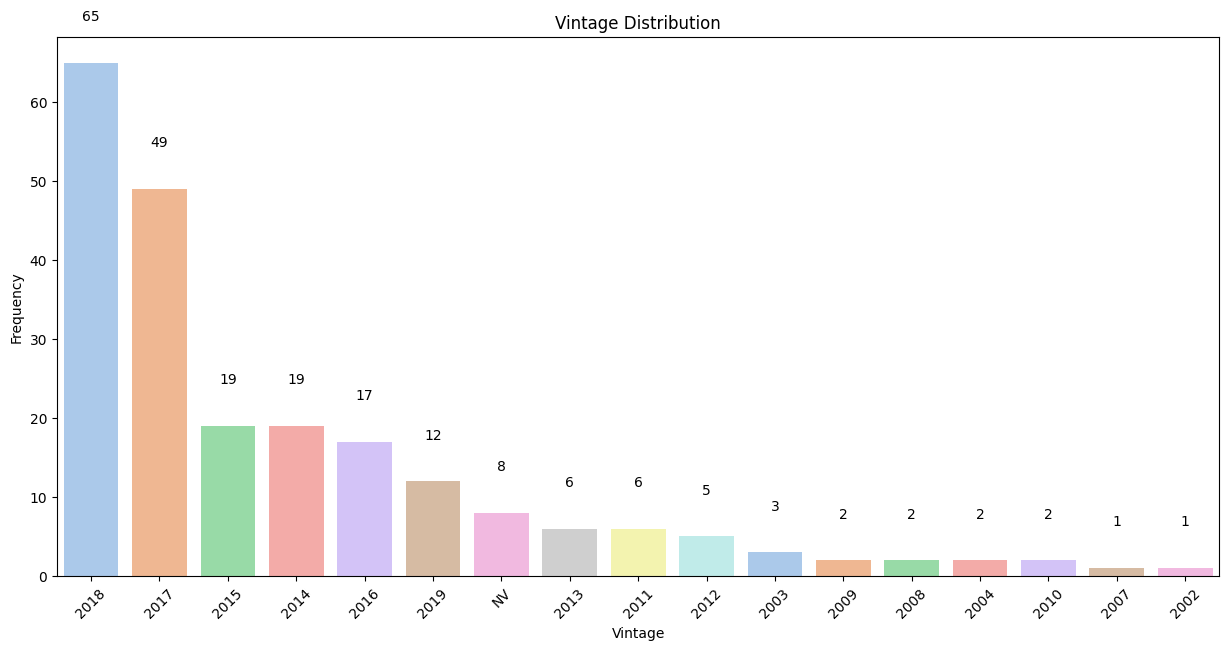

In [51]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Menghitung jumlah observasi distribusi data untuk atribut 'vintage'
vintage_counts = df_temp['vintage'].value_counts()

# Persiapan data untuk bar chart
labels_vintage = vintage_counts.index
values_vintage = vintage_counts.values

# Plot bar chart
plt.figure(figsize=(15, 7))
bars_vintage = sns.barplot(x=labels_vintage, y=values_vintage, palette="pastel")

# Tambahkan nilai data pada grafik
for i, value in enumerate(values_vintage):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan label pada sumbu x dan y
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.title('Vintage Distribution')

plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca

plt.show()


<ipython-input-52-c4724e3dbfa3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_kind = sns.barplot(x=labels_kind, y=values_kind, palette="pastel")


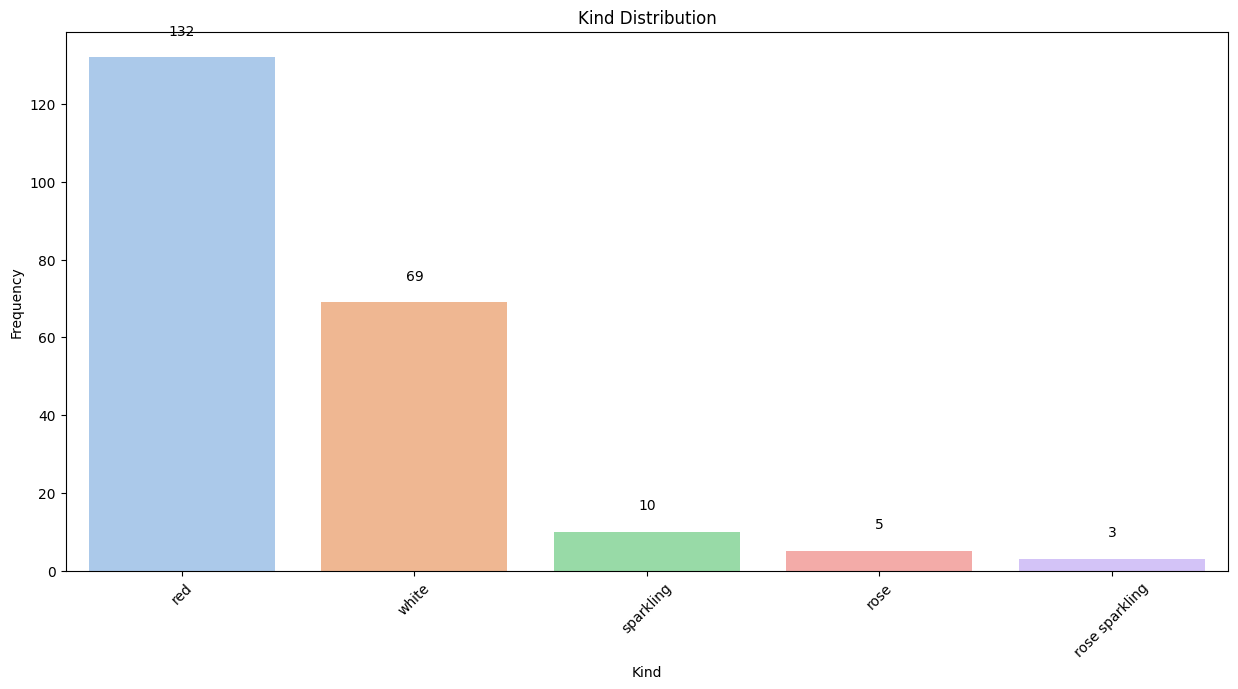

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Menghitung jumlah observasi distribusi data untuk atribut 'kind'
kind_counts = df_temp['kind'].value_counts()

# Persiapan data untuk bar chart
labels_kind = kind_counts.index
values_kind = kind_counts.values

# Plot bar chart
plt.figure(figsize=(15, 7))
bars_kind = sns.barplot(x=labels_kind, y=values_kind, palette="pastel")

# Tambahkan nilai data pada grafik
for i, value in enumerate(values_kind):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan label pada sumbu x dan y
plt.xlabel('Kind')
plt.ylabel('Frequency')
plt.title('Kind Distribution')

plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca

plt.show()


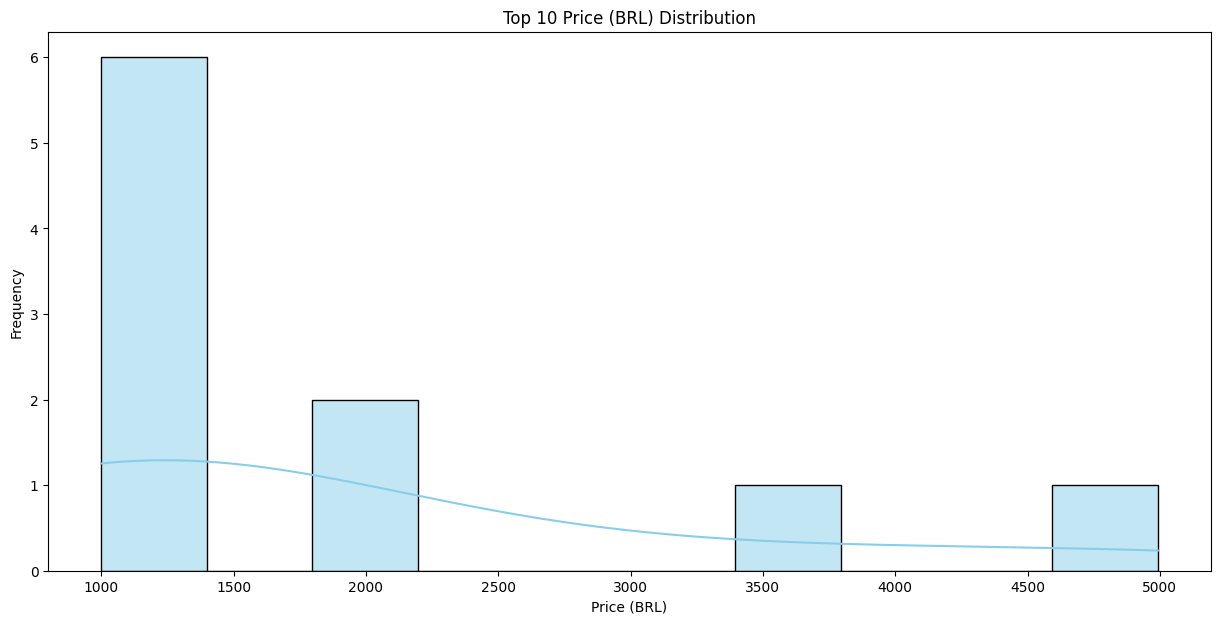

In [60]:
# Convert 'price_brl' to numeric if it's not already
df['price_brl'] = pd.to_numeric(df['price_brl'], errors='coerce')

# Drop missing values if any
df = df.dropna(subset=['price_brl'])

# Mengambil 10 harga teratas
top_prices_brl = df['price_brl'].nlargest(10)

# Plot histogram distribusi harga teratas
plt.figure(figsize=(15, 7))
sns.histplot(top_prices_brl, bins=10, kde=True, color='skyblue')

# Tambahkan label pada sumbu x dan y
plt.xlabel('Price (BRL)')
plt.ylabel('Frequency')
plt.title('Top 10 Price (BRL) Distribution')

plt.show()


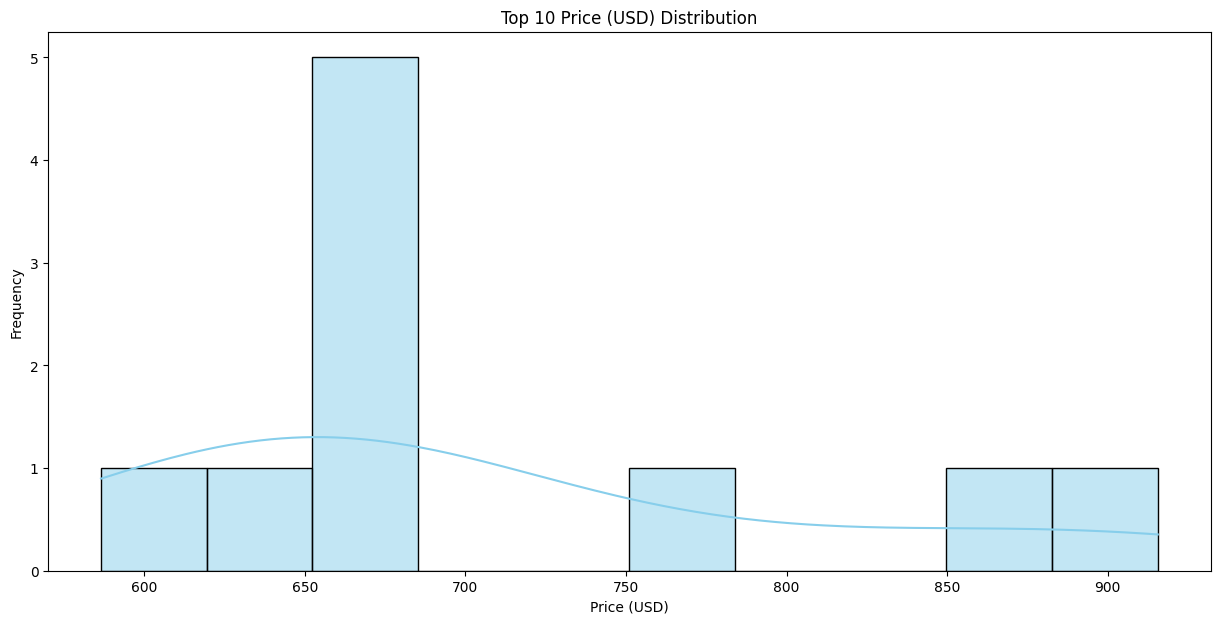

In [59]:
# Convert 'price_usd' to numeric if it's not already
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')

# Drop missing values if any
df = df.dropna(subset=['price_usd'])

# Mengambil 10 harga teratas
top_prices_usd = df['price_usd'].nlargest(10)

# Plot histogram distribusi harga teratas
plt.figure(figsize=(15, 7))
sns.histplot(top_prices_usd, bins=10, kde=True, color='skyblue')

# Tambahkan label pada sumbu x dan y
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Top 10 Price (USD) Distribution')

plt.show()
